# Аналитика в авиакомпании

**Цель исследования:  изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали**

### После исследовательского анализа данных и составления запросов у нас есть 2 файла с данными:

* query_1.csv — результат первого запроса. В нём содержится информация о: model — модели самолета flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года

* query_3.csv — результат третьего запроса. В нём содержится информация о: city — городах average_flights — среднем количестве рейсов, прибывающих в город city за день в сентябре 2018 года

### Для этих двух наборов данных нужно:
* импортировать файлы;
* изучить данные в них;
* проверить типы данных на корректность;
* выбрать топ-10 городов по количеству рейсов;
* построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
* сделать выводы по каждому из графиков, пояснить результат.

# Шаг 1. Подготовка и проверка данных

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
query_1 = pd.read_csv(r'C:\Users\Max_Berdnikov\Desktop\data\query_1.csv')
query_3 = pd.read_csv(r'C:\Users\Max_Berdnikov\Desktop\data\query_3.csv')

In [3]:
query_1

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [5]:
query_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 260.0+ bytes


In [6]:
query_1.describe()

,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


In [4]:
query_3

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


In [7]:
query_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [8]:
query_3.describe()

,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


# Шаг 2. Анализ

**Начнем с анализа топ-10 городов по количеству рейсов**

In [45]:
query_3.sort_values('average_flights', ascending=False).head(10)

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


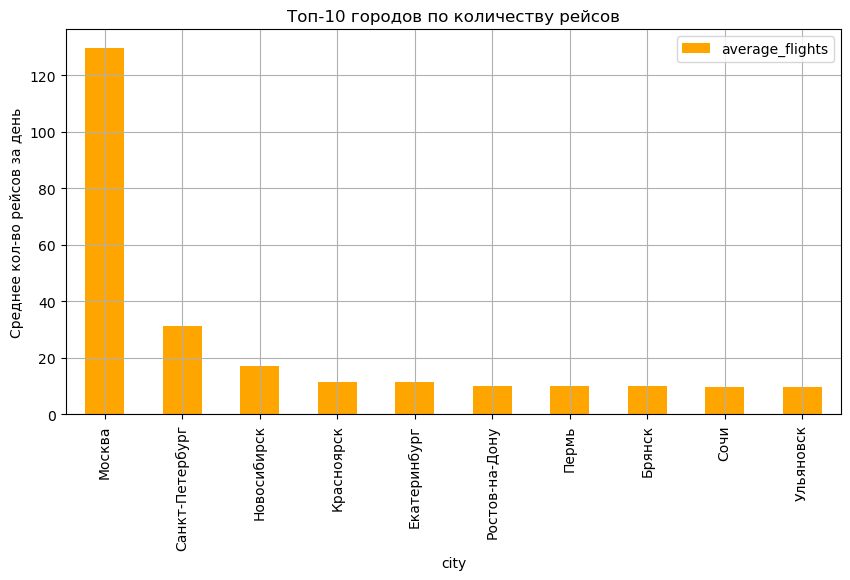

In [35]:
query_3.sort_values('average_flights', ascending=False).head(10).plot(x='city', 
                                                                      kind='bar',
                                                                      figsize=(10, 5), 
                                                                      color='orange', 
                                                                      grid=True)
plt.ylabel('Среднее кол-во рейсов за день')
plt.title('Топ-10 городов по количеству рейсов')
plt.show()

**Выводы**

С огромным отрывом в топ-10 городов по количеству рейсов на 1-ом месте находится **Москва** (около 130 рейсов в день). Более скромные результы для **Санкт-Петербурга** (31 рейс) и **Новосибирска** (17 рейсов). В такие города как **Красноярск, Екатеринбург, Ростов-на-Дону, Пермь, Брянск, Сочи, Ульяновск** прибывает около 10 рейсов в день.

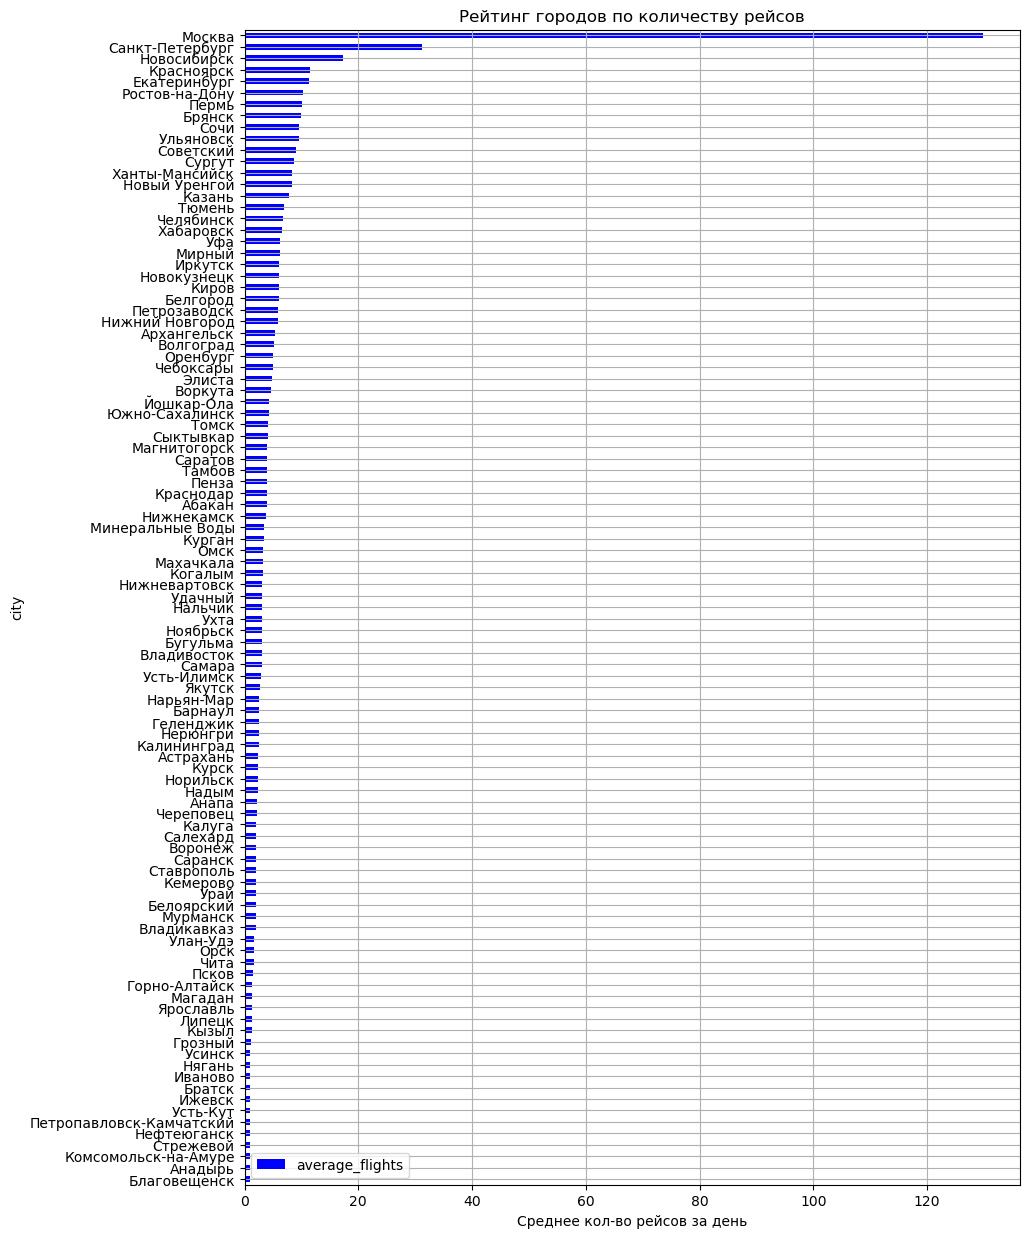

In [43]:
query_3.sort_values('average_flights').plot(x='city', 
                                                            kind='barh',
                                                            figsize=(10, 15), 
                                                            color='blue', 
                                                            grid=True)
plt.xlabel('Среднее кол-во рейсов за день')
plt.title('Рейтинг городов по количеству рейсов');

**Вывод**

После топ-3 городов можно наблюдать плавное уменьшение количества пребывающих рейсов от 11 и вплоть до 1-го рейса в день (Благовещенск, Анадырь и т.д.)

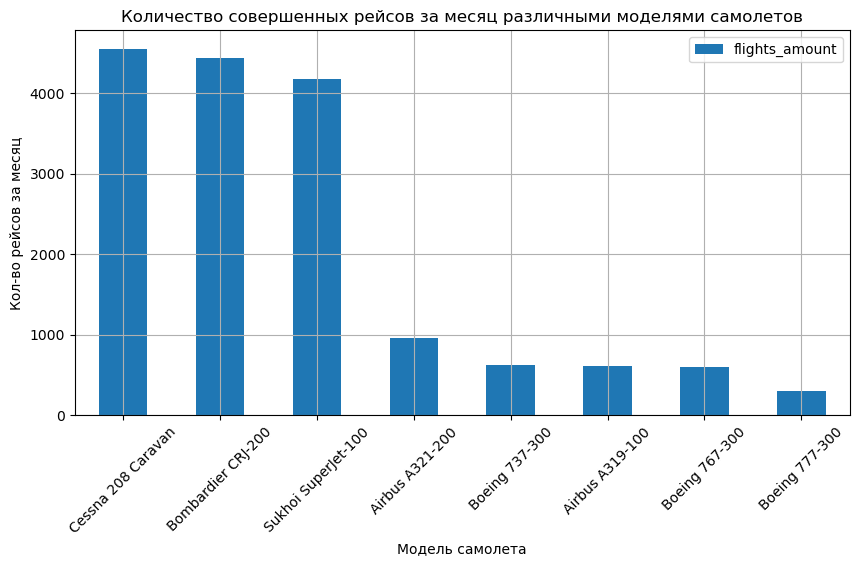

In [34]:
query_1.sort_values('flights_amount', ascending=False).plot(x='model', 
                                                            kind='bar', 
                                                            figsize=(10, 5),
                                                            grid=True)
plt.ylabel('Кол-во рейсов за месяц')
plt.xlabel('Модель самолета')
plt.title('Количество совершенных рейсов за месяц различными моделями самолетов')
plt.xticks(rotation = 45);

**Вывод**

Первые 3 места с небольшим отрывом друг от друга занимают **Cessna 208 Caravan**, **Bombardier CRJ-200** и **Sukhoi SuperJet-100**. Это 3 самолета с наименьшей пассажировместимостью и предназначенных для полета на короткие и средние дистанции.

**Airbus A321-200** совершает гораздо меньшее количество рейсов (930). Около 600 рейсов в месяц совершают самолеты **Boeing 737-300**, **Airbus A319-100** и **Boeing 767-300**. Заключает топ **Boeing 777-300**, который совершает только 300 рейсов.